Our goal is to indentify type of people who choose which product

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
os.chdir('C:\\Users\Ashok kumar\Desktop\chanu\DSML_Course\DataSet')

In [3]:
df= pd.read_csv('aerofit_treadmill.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.shape

(180, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


we can say that there are no null values in the dataset and it looks good

In [8]:
df.Product.unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

There are only 3 types of products available in the dataset, we can change them into cateogorical data type

In [9]:
dummy_product=pd.get_dummies(df.Product)

In [10]:
dummy_product.shape

(180, 3)

In [11]:
df=pd.concat([dummy_product.iloc[:,1:],df],axis=1)

In [12]:
df.head()

,KP481,KP781,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,0,KP281,18,Male,14,Single,3,4,29562,112
1,0,0,KP281,19,Male,15,Single,2,3,31836,75
2,0,0,KP281,19,Female,14,Partnered,4,3,30699,66
3,0,0,KP281,19,Male,12,Single,3,3,32973,85
4,0,0,KP281,20,Male,13,Partnered,4,2,35247,47


We can identify the type of product using the two columns KP481 and KP781

The main goal of this project is to identify the kind of product the customer purchases according to their characteristics

In [13]:
df.nunique()

KP481             2
KP781             2
Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

There are many values in Income and Age we can seperate them into buckets

In [14]:
df['Age_cut'] = pd.cut(df['Age'],bins= [17,22,27,32,37,42,47,51],labels=['18-22','22-27','27-32','32-37','37-42','42-47','47-50'])

In [15]:
df['Income_cut'] = pd.cut(df['Income'],bins=[29561,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,100000,104582],
                          labels=['35000','40000','45000','50000','55000','60000','65000','70000','75000','80000','85000','90000','95000','100000'])

In [16]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

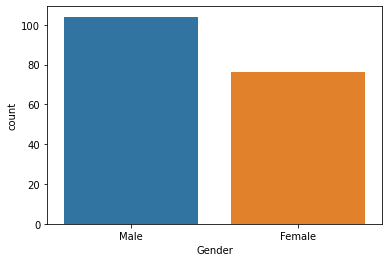

In [17]:
sns.countplot(x=df.Gender)

More male people are present compared to female

In [18]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

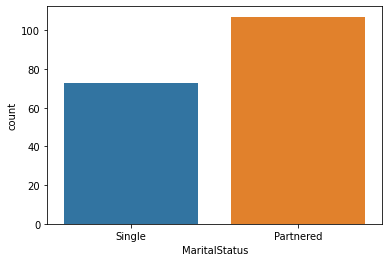

In [19]:
sns.countplot(x=df.MaritalStatus)

There are more Partnered people compared to single people

<AxesSubplot:xlabel='Gender', ylabel='count'>

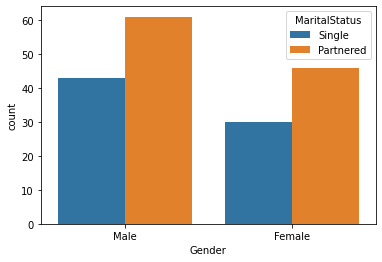

In [20]:
sns.countplot(x=df.Gender,hue=df.MaritalStatus)

There are more Partnered people compared to single people in both male and female

<AxesSubplot:xlabel='Product', ylabel='count'>

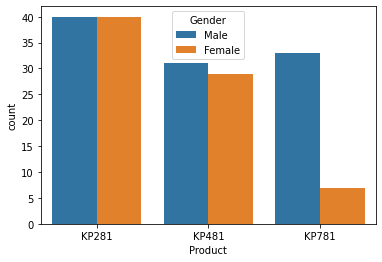

In [21]:
sns.countplot(x=df.Product,hue=df.Gender)

People who use KP781 are more Males compared to female

In [22]:
gender_marital_df=pd.crosstab(index=df.Product,columns = [df.Gender,df.MaritalStatus],margins=True)
gender_marital_df

Gender           Female             Male         All
MaritalStatus Partnered Single Partnered Single     
Product                                             
KP281                27     13        21     19   80
KP481                15     14        21     10   60
KP781                 4      3        19     14   40
All                  46     30        61     43  180

<AxesSubplot:xlabel='Product', ylabel='count'>

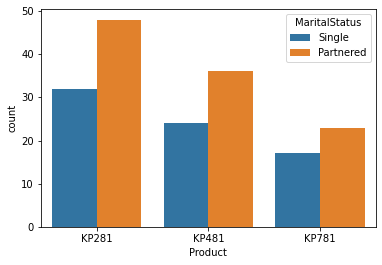

In [23]:
sns.countplot(x=df.Product,hue=df.MaritalStatus)

More partnered people use the Products compared to Single people

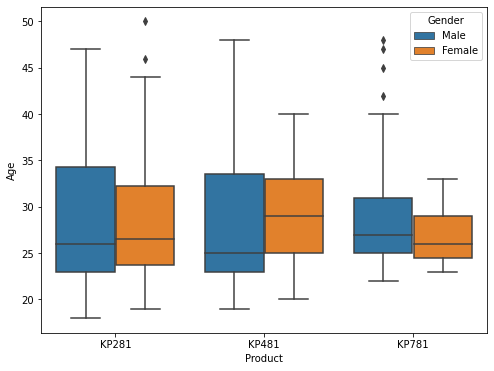

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df.Age,x=df.Product,hue=df.Gender)
plt.show()

There are more outliers in KP281 Female users and KP781 Male users

<AxesSubplot:xlabel='Income_cut', ylabel='count'>

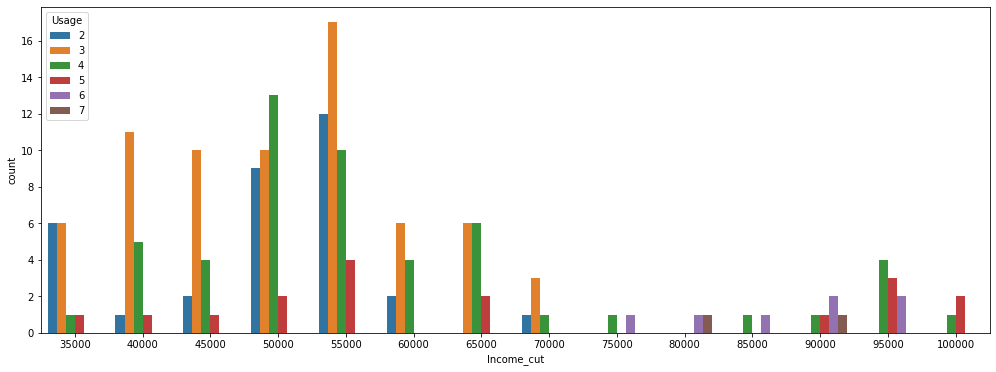

In [25]:
plt.figure(figsize=(17,6))
sns.countplot(x=df.Income_cut,hue=df.Usage)

As the income increases Usage of products is more

<AxesSubplot:>

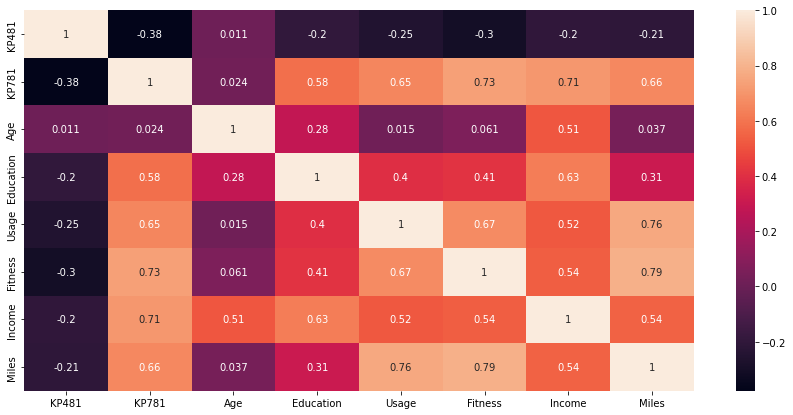

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

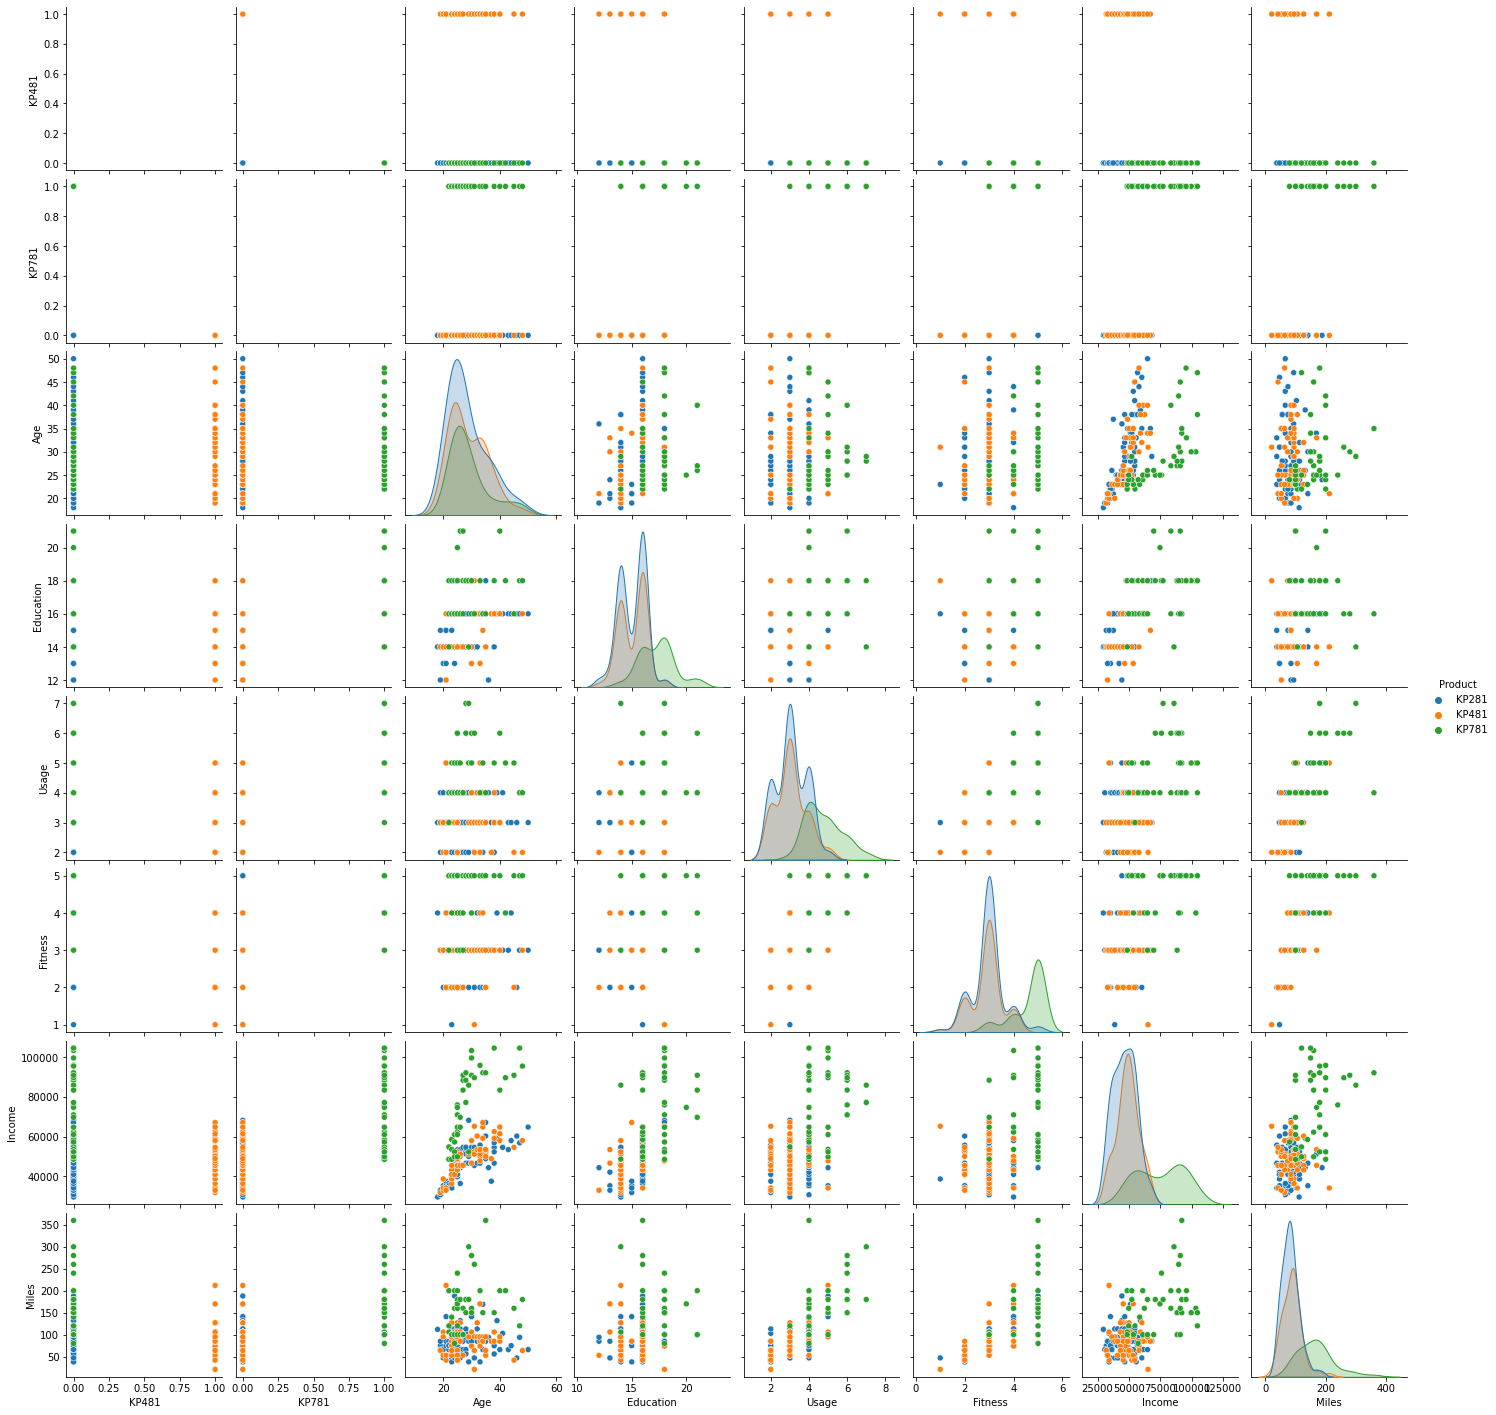

In [27]:
sns.pairplot(data = df, hue = 'Product')

In [28]:
df.loc[(df.Product == 'KP781') & (df.Age > 18) & (df.Age <= 33) ]['Usage'].value_counts()

4    15
5     8
6     6
7     2
3     1
Name: Usage, dtype: int64

In [29]:
df.loc[(df.Product == 'KP781') & (df.Age > 18) & (df.Age <= 33) ]['Income_cut'].value_counts()

50000     5
65000     5
95000     5
55000     4
90000     4
60000     2
75000     2
80000     2
70000     1
85000     1
100000    1
35000     0
40000     0
45000     0
Name: Income_cut, dtype: int64

In [30]:
kp781_df=df[df.Product == 'KP781']

In [31]:
kp781_df.head()

,KP481,KP781,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cut,Income_cut
140,0,1,KP781,22,Male,14,Single,4,3,48658,106,18-22,50000
141,0,1,KP781,22,Male,16,Single,3,5,54781,120,18-22,55000
142,0,1,KP781,22,Male,18,Single,4,5,48556,200,18-22,50000
143,0,1,KP781,23,Male,16,Single,4,5,58516,140,22-27,60000
144,0,1,KP781,23,Female,18,Single,5,4,53536,100,22-27,55000


In [32]:
pd.crosstab(index=kp781_df.Income_cut,columns=[kp781_df.Age_cut,kp781_df.Usage],normalize=True,margins=True)

Age_cut     18-22        22-27                27-32              32-37         \
Usage           3     4      4      5      6      5     6      7     4      5   
Income_cut                                                                      
50000       0.000  0.05  0.050  0.025  0.000  0.000  0.00  0.000  0.00  0.000   
55000       0.025  0.00  0.000  0.050  0.000  0.025  0.00  0.000  0.00  0.000   
60000       0.000  0.00  0.050  0.000  0.000  0.000  0.00  0.000  0.00  0.000   
65000       0.000  0.00  0.075  0.050  0.000  0.000  0.00  0.000  0.00  0.000   
70000       0.000  0.00  0.025  0.000  0.000  0.000  0.00  0.000  0.00  0.000   
75000       0.000  0.00  0.025  0.000  0.025  0.000  0.00  0.000  0.00  0.000   
80000       0.000  0.00  0.000  0.000  0.025  0.000  0.00  0.025  0.00  0.000   
85000       0.000  0.00  0.025  0.000  0.000  0.000  0.00  0.000  0.00  0.000   
90000       0.000  0.00  0.025  0.000  0.000  0.000  0.05  0.025  0.00  0.000   
95000       0.000  0.00  0.025  0.000  0.000  0.025  0.05  0.000  0.05  0.025   
100000      0.000  0.00  0.000  0.000  0.000  0.025  0.00  0.000  0.00  0.000   
All         0.025  0.05  0.300  0.125  0.050  0.075  0.10  0.050  0.05  0.025   

Age_cut     37-42         42-47         47-50    All  
Usage           5      6      4      5      4         
Income_cut                                            
50000       0.000  0.000  0.000  0.000  0.000  0.125  
55000       0.000  0.000  0.000  0.000  0.000  0.100  
60000       0.000  0.000  0.000  0.000  0.000  0.050  
65000       0.000  0.000  0.000  0.000  0.000  0.125  
70000       0.000  0.000  0.000  0.000  0.000  0.025  
75000       0.000  0.000  0.000  0.000  0.000  0.050  
80000       0.000  0.000  0.000  0.000  0.000  0.050  
85000       0.000  0.025  0.000  0.000  0.000  0.050  
90000       0.025  0.000  0.000  0.000  0.000  0.125  
95000       0.000  0.000  0.000  0.025  0.025  0.225  
100000      0.025  0.000  0.025  0.000  0.000  0.075  
All         0.050  0.025  0.025  0.025  0.025  1.000

From above we can say that people whose age is in between 18 and 33 and their usage is greater than 4 usually and income greater than 50K and people with more age and higher income go for KP781

<AxesSubplot:xlabel='Miles'>

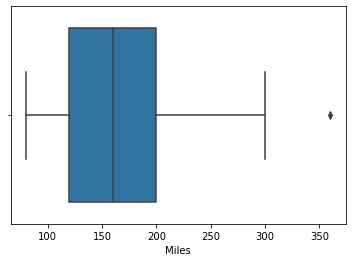

In [33]:
sns.boxplot(x=kp781_df.Miles)

People who runs more miles uses KP781 Product

In [34]:
df.loc[(df.Product == 'KP481') ]['Fitness'].value_counts()

3    39
2    12
4     8
1     1
Name: Fitness, dtype: int64

In [35]:
df.loc[(df.Product == 'KP481') ]['Usage'].value_counts()

3    31
2    14
4    12
5     3
Name: Usage, dtype: int64

In [36]:
df.loc[(df.Product == 'KP481')]['Income_cut'].value_counts()

55000     18
50000     15
35000      6
45000      6
60000      5
65000      5
40000      3
70000      2
75000      0
80000      0
85000      0
90000      0
95000      0
100000     0
Name: Income_cut, dtype: int64

In [37]:
kp481_df=df[df.Product == 'KP481']

In [38]:
kp481_df.head()

,KP481,KP781,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cut,Income_cut
80,1,0,KP481,19,Male,14,Single,3,3,31836,64,18-22,35000
81,1,0,KP481,20,Male,14,Single,2,3,32973,53,18-22,35000
82,1,0,KP481,20,Female,14,Partnered,3,3,34110,106,18-22,35000
83,1,0,KP481,20,Male,14,Single,3,3,38658,95,18-22,40000
84,1,0,KP481,21,Female,14,Partnered,5,4,34110,212,18-22,35000


In [39]:
pd.crosstab(index=kp481_df.Usage,columns=[kp481_df.Fitness,kp481_df.Income_cut],normalize=True,margins=True)

Fitness            1         2                                   3        \
Income_cut     70000     35000 45000     50000     55000     35000 40000   
Usage                                                                      
2           0.016667  0.033333  0.00  0.016667  0.033333  0.016667  0.00   
3           0.000000  0.000000  0.05  0.000000  0.050000  0.033333  0.05   
4           0.000000  0.000000  0.00  0.016667  0.000000  0.000000  0.00   
5           0.000000  0.000000  0.00  0.000000  0.000000  0.000000  0.00   
All         0.016667  0.033333  0.05  0.033333  0.083333  0.050000  0.05   

Fitness                                                                 \
Income_cut     45000     50000     55000     60000     65000     70000   
Usage                                                                    
2           0.016667  0.033333  0.050000  0.016667  0.000000  0.000000   
3           0.000000  0.050000  0.100000  0.050000  0.033333  0.016667   
4           0.000000  0.083333  0.016667  0.000000  0.050000  0.000000   
5           0.000000  0.016667  0.016667  0.000000  0.000000  0.000000   
All         0.016667  0.183333  0.183333  0.066667  0.083333  0.016667   

Fitness            4                                               All  
Income_cut     35000     45000     50000     55000     60000            
Usage                                                                   
2           0.000000  0.000000  0.000000  0.000000  0.000000  0.233333  
3           0.000000  0.033333  0.033333  0.000000  0.016667  0.516667  
4           0.000000  0.000000  0.000000  0.033333  0.000000  0.200000  
5           0.016667  0.000000  0.000000  0.000000  0.000000  0.050000  
All         0.016667  0.033333  0.033333  0.033333  0.016667  1.000000

From above we can say that people with people with weekly usage of 3 days and income between 35K to 50K prefer KP481

<AxesSubplot:xlabel='Miles'>

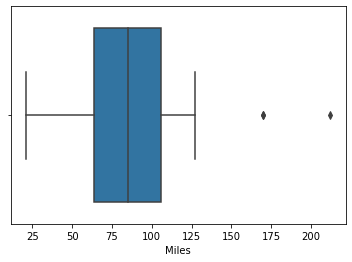

In [40]:
sns.boxplot(x=kp481_df.Miles)

Miles for the users who use KP281 and KP481 almost identical, lets compare with Income of the users

<AxesSubplot:xlabel='Miles', ylabel='Count'>

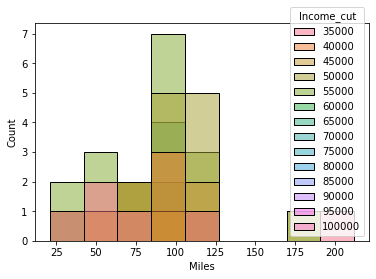

In [41]:
sns.histplot(x=kp481_df.Miles,hue=kp481_df.Income_cut)

People who use KP481 have more income than users who use KP281 

In [42]:
kp281_df=df[df.Product == 'KP281']

In [43]:
kp281_df.head()

,KP481,KP781,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_cut,Income_cut
0,0,0,KP281,18,Male,14,Single,3,4,29562,112,18-22,35000
1,0,0,KP281,19,Male,15,Single,2,3,31836,75,18-22,35000
2,0,0,KP281,19,Female,14,Partnered,4,3,30699,66,18-22,35000
3,0,0,KP281,19,Male,12,Single,3,3,32973,85,18-22,35000
4,0,0,KP281,20,Male,13,Partnered,4,2,35247,47,18-22,40000


In [44]:
pd.crosstab(index=kp281_df.Age_cut,columns=[kp281_df.Income_cut,kp281_df.Usage],normalize=True,margins=True)

Income_cut   35000                 40000                           45000  \
Usage            2     3       4       2       3       4       5       2   
Age_cut                                                                    
18-22       0.0125  0.05  0.0125  0.0125  0.0500  0.0250  0.0125  0.0000   
22-27       0.0250  0.00  0.0000  0.0000  0.0375  0.0375  0.0000  0.0125   
27-32       0.0000  0.00  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
32-37       0.0000  0.00  0.0000  0.0000  0.0125  0.0000  0.0000  0.0000   
37-42       0.0000  0.00  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
42-47       0.0000  0.00  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
47-50       0.0000  0.00  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
All         0.0375  0.05  0.0125  0.0125  0.1000  0.0625  0.0125  0.0125   

Income_cut                  ...   50000   55000                   60000  \
Usage            3       4  ...       4       2       3       4       2   
Age_cut                     ...                                           
18-22       0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000   
22-27       0.0625  0.0375  ...  0.0125  0.0250  0.0250  0.0250  0.0000   
27-32       0.0000  0.0000  ...  0.0125  0.0250  0.0500  0.0375  0.0000   
32-37       0.0000  0.0125  ...  0.0125  0.0125  0.0000  0.0125  0.0125   
37-42       0.0000  0.0000  ...  0.0000  0.0250  0.0000  0.0125  0.0000   
42-47       0.0000  0.0000  ...  0.0000  0.0000  0.0125  0.0000  0.0000   
47-50       0.0000  0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000   
All         0.0625  0.0500  ...  0.0375  0.0875  0.0875  0.0875  0.0125   

Income_cut                   65000   70000     All  
Usage            3       4       3       3          
Age_cut                                             
18-22       0.0000  0.0000  0.0000  0.0000  0.1750  
22-27       0.0000  0.0000  0.0000  0.0000  0.3750  
27-32       0.0000  0.0000  0.0000  0.0125  0.1875  
32-37       0.0000  0.0000  0.0125  0.0125  0.1125  
37-42       0.0125  0.0125  0.0125  0.0000  0.0875  
42-47       0.0125  0.0125  0.0125  0.0000  0.0500  
47-50       0.0000  0.0000  0.0125  0.0000  0.0125  
All         0.0250  0.0250  0.0500  0.0250  1.0000  

[8 rows x 23 columns]

People with less income and with less usage and people with more income and less usage usually go for KP281 Product

<AxesSubplot:xlabel='Miles'>

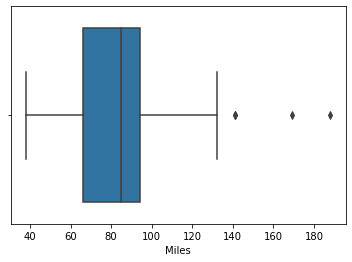

In [45]:
sns.boxplot(x=kp281_df.Miles)

People who use KP281 runs less than 130 miles

<AxesSubplot:xlabel='Miles', ylabel='Count'>

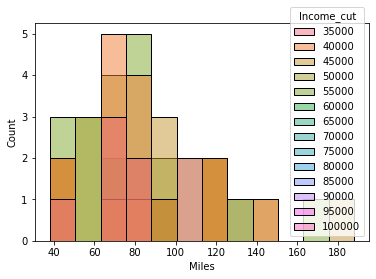

In [46]:
sns.histplot(x=kp281_df.Miles,hue=kp281_df.Income_cut)

People who use KP281 have less income compared to people who use KP481 Product